# Ejercicios de Laboratorio David Salamanca

### Ejercicio 1:

1. Escriba un programa para modelar el comportamiento del ejemplo probabilístico de la doble rendija representado en la figura.
2. Muestre los resultados del experimento usando un diagrama de barras. Cada barra representa la intensidad de la luz en el objetivo específico.


![Doble rendija cuántica.](images/ProbabilisticSystem.png)

Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 2 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 2 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 3 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 3 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 4 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 4 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 5 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 5 desde la rendija 2:

El estado del sistema al inicio es:

[[1], [0], [0], [0], [0], [0], [0], [0]]

El estado del grafo con números complejos es: 

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
[(0.5, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
[(0.5, 0), (0, 0), (0, 0), (0, 0), (0, 0

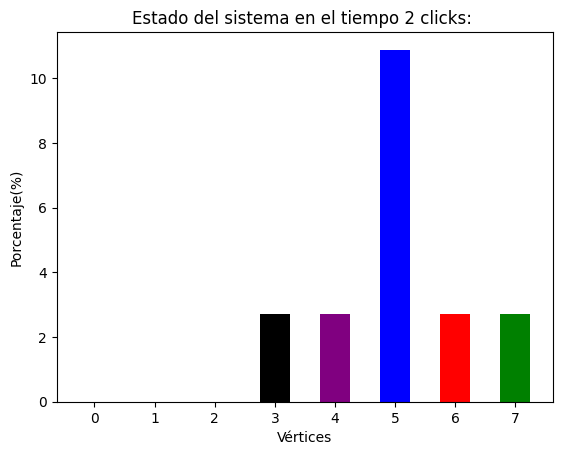

In [8]:
from matplotlib import pyplot as plt
import math

# Multiplicación de matrices
def multiplicar_matrices(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            valor = sum(float(mat1[i][k]) * float(mat2[k][j]) for k in range(len(mat1[0])))
            fila_resultado.append(round(valor, 2))
        resultado.append(fila_resultado)
    return resultado

# Evolución temporal de un grafo
def evolucionar_grafo(grafo, clicks_tiempo):
    grafo_actual = grafo
    for _ in range(1, clicks_tiempo):
        grafo_actual = multiplicar_matrices(grafo, grafo_actual)
    return grafo_actual

# Calcula los estados resultantes en base a un grafo y un estado inicial
def calcular_estados(grafo, estado_inicial):
    resultado = []
    for i in range(len(grafo)):
        valor = sum(grafo[i][k] * estado_inicial[k][0] for k in range(len(grafo[0])))
        resultado.append(valor)
    return resultado

# Multiplicación de matrices cuánticas
def multiplicar_matrices_complejas(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            parte_real = sum(mat1[i][k][0] * mat2[k][j][0] - mat1[i][k][1] * mat2[k][j][1] for k in range(len(mat1[0])))
            parte_imaginaria = sum(mat1[i][k][0] * mat2[k][j][1] + mat1[i][k][1] * mat2[k][j][0] for k in range(len(mat1[0])))
            fila_resultado.append((round(parte_real, 4), round(parte_imaginaria, 4)))
        resultado.append(fila_resultado)
    return resultado

# Calcula las probabilidades del grafo
def calcular_probabilidades(matriz):
    return [[round(complejo[0]**2 + complejo[1]**2, 4) for complejo in fila] for fila in matriz]

# Graficar los resultados
def graficar_resultados(resultado, num_nodos, tiempo, etiqueta):
    nombres_nodos = [str(i) for i in range(num_nodos)]
    colores = ["blue", "red", "green", "black", "purple"]
    
    plt.title(f"Estado del sistema en el tiempo {tiempo} clicks: ")
    plt.bar(nombres_nodos, height=resultado, color=colores, width=0.5)
    plt.xlabel("Vértices")
    plt.ylabel(etiqueta)
    plt.show()

# Simulación de particulas
def simular_particulas(estado_inicial, grafo, tiempo):
    grafo_evolucionado = evolucionar_grafo(grafo, tiempo)
    resultado = calcular_estados(grafo_evolucionado, estado_inicial)
    return resultado

# Simulación clásica de multiplicación de matrices
def simular_multiplicacion_matrices(estado_inicial, grafo):
    grafo_evolucionado = evolucionar_grafo(grafo, 2)
    return calcular_estados(grafo_evolucionado, estado_inicial)

# Simulación cuántica
def simular_cuantico(estado_inicial, grafo):
    grafo_evolucionado = multiplicar_matrices_complejas(grafo, grafo)
    probabilidades = calcular_probabilidades(grafo_evolucionado)
    return calcular_estados(probabilidades, estado_inicial)

# Experimento de las múltiples rendijas cuántico
def crear_grafo_cuantico(num_nodos, num_rendijas):
    # Inicializar el grafo cuántico con nodos y rendijas
    grafo = []
    # Crear la matriz de adyacencia
    for i in range(num_nodos):
        fila = []
        for j in range(num_nodos):
            # Nodo inicial conectado a las rendijas
            if i == 0:
                probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones de las rendijas al nodo inicial
            elif i <= num_rendijas:
                if j == 0:
                    # Definir la probabilidad de que una partícula pase por la rendija
                    probabilidad = (0.5, 0)
                else:
                    probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones desde las rendijas a los objetivos
            else:
                if 0 < j <= num_rendijas:
                    # Solicitar la probabilidad al usuario de que el fotón pase de una rendija a un objetivo
                    print(f"Con qué probabilidad llega el fotón al objetivo {i - num_rendijas} desde la rendija {j}:")
                    prob_real = float(input("Parte real de la probabilidad: "))
                    prob_imag = float(input("Parte imaginaria de la probabilidad: "))
                    probabilidad = (prob_real, prob_imag)
                    fila.append(probabilidad)    
                elif j == i:
                    fila.append((1, 0)) # Nodo conectado a sí mismo
                else:
                    fila.append((0, 0)) # No hay conexión
        grafo.append(fila)
    return grafo

def experimento_rendijas_cuantico():
    num_rendijas = int(input("Dame el número de rendijas que quieres usar: "))
    num_objetivos = int(input("Dame el número de objetivos que quieres usar: "))
    num_nodos = num_rendijas + num_objetivos + 1
    estado_inicial = [[1]] + [[0] for _ in range(num_nodos - 1)]
    
    grafo = crear_grafo_cuantico(num_nodos, num_rendijas)
    
    print("\nEl estado del sistema al inicio es:\n")
    print(estado_inicial)
    
    print("\nEl estado del grafo con números complejos es: \n")
    for fila in grafo:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad es: \n")
    for fila_probabilidad in calcular_probabilidades(grafo):
        print(fila_probabilidad)
    
    print("\nEl estado del grafo después de 2 time clicks es: \n")
    grafo_tras_dos_clicks = multiplicar_matrices_complejas(grafo, grafo)
    for fila in grafo_tras_dos_clicks:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad después de 2 time clicks es:\n")
    for fila_probabilidad in calcular_probabilidades(grafo_tras_dos_clicks):
        print(fila_probabilidad)
    
    print("\nEl estado del sistema después de 2 time clicks es:\n")
    estado_final = calcular_estados(calcular_probabilidades(grafo_tras_dos_clicks), estado_inicial)
    print(estado_final)
    
    for i in range(len(estado_final)):
        estado_final[i] *= 100
    
    graficar_resultados(estado_final, num_nodos, 2, "Porcentaje(%)")

# Ejecuta el experimento de las rendijas cuántico
experimento_rendijas_cuantico()

### Ejercicio 2:

1. Escriba un programa para modelar el comportamiento del ejemplo cuántico de la doble rendija representado en la figura.
2. Muestre los resultados del experimento usando un diagrama de barras. Cada barra representa la intensidad de la luz en el objetivo específico.

![Doble rendija cuántica.](images/QuantumSystem.png)

Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 1 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 2 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 2 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 3 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 3 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 4 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 4 desde la rendija 2:
Con qué probabilidad llega el fotón al objetivo 5 desde la rendija 1:
Con qué probabilidad llega el fotón al objetivo 5 desde la rendija 2:

El estado del sistema al inicio es:

[[1], [0], [0], [0], [0], [0], [0], [0]]

El estado del grafo con números complejos es: 

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
[(0.7071, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
[(0.7071, 0), (0, 0), (0, 0), (0, 0),

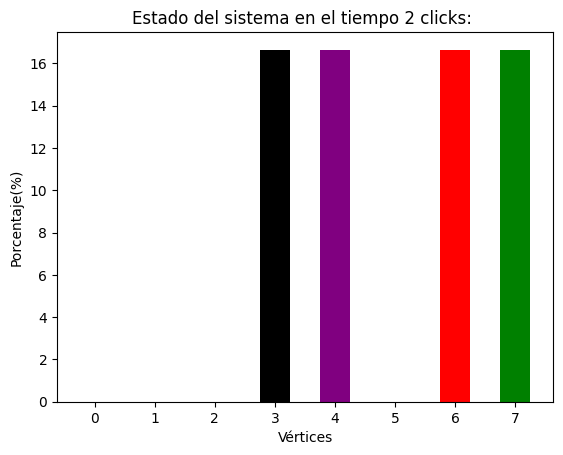

In [9]:
from matplotlib import pyplot as plt
import math

# Multiplicación de matrices
def multiplicar_matrices(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            valor = sum(float(mat1[i][k]) * float(mat2[k][j]) for k in range(len(mat1[0])))
            fila_resultado.append(round(valor, 2))
        resultado.append(fila_resultado)
    return resultado

# Evolución temporal de un grafo
def evolucionar_grafo(grafo, clicks_tiempo):
    grafo_actual = grafo
    for _ in range(1, clicks_tiempo):
        grafo_actual = multiplicar_matrices(grafo, grafo_actual)
    return grafo_actual

# Calcula los estados resultantes en base a un grafo y un estado inicial
def calcular_estados(grafo, estado_inicial):
    resultado = []
    for i in range(len(grafo)):
        valor = sum(grafo[i][k] * estado_inicial[k][0] for k in range(len(grafo[0])))
        resultado.append(valor)
    return resultado

# Multiplicación de matrices cuánticas
def multiplicar_matrices_complejas(mat1, mat2):
    resultado = []
    for i in range(len(mat1)):
        fila_resultado = []
        for j in range(len(mat2[0])):
            parte_real = sum(mat1[i][k][0] * mat2[k][j][0] - mat1[i][k][1] * mat2[k][j][1] for k in range(len(mat1[0])))
            parte_imaginaria = sum(mat1[i][k][0] * mat2[k][j][1] + mat1[i][k][1] * mat2[k][j][0] for k in range(len(mat1[0])))
            fila_resultado.append((round(parte_real, 4), round(parte_imaginaria, 4)))
        resultado.append(fila_resultado)
    return resultado

# Calcula las probabilidades del grafo
def calcular_probabilidades(matriz):
    return [[round(complejo[0]**2 + complejo[1]**2, 4) for complejo in fila] for fila in matriz]

# Graficar los resultados
def graficar_resultados(resultado, num_nodos, tiempo, etiqueta):
    nombres_nodos = [str(i) for i in range(num_nodos)]
    colores = ["blue", "red", "green", "black", "purple"]
    
    plt.title(f"Estado del sistema en el tiempo {tiempo} clicks: ")
    plt.bar(nombres_nodos, height=resultado, color=colores, width=0.5)
    plt.xlabel("Vértices")
    plt.ylabel(etiqueta)
    plt.show()

# Simulación de particulas
def simular_particulas(estado_inicial, grafo, tiempo):
    grafo_evolucionado = evolucionar_grafo(grafo, tiempo)
    resultado = calcular_estados(grafo_evolucionado, estado_inicial)
    return resultado

# Simulación clásica de multiplicación de matrices
def simular_multiplicacion_matrices(estado_inicial, grafo):
    grafo_evolucionado = evolucionar_grafo(grafo, 2)
    return calcular_estados(grafo_evolucionado, estado_inicial)

# Simulación cuántica
def simular_cuantico(estado_inicial, grafo):
    grafo_evolucionado = multiplicar_matrices_complejas(grafo, grafo)
    probabilidades = calcular_probabilidades(grafo_evolucionado)
    return calcular_estados(probabilidades, estado_inicial)

# Experimento de las múltiples rendijas cuántico
def crear_grafo_cuantico(num_nodos, num_rendijas):
    # Inicializar el grafo cuántico con nodos y rendijas
    grafo = []
    # Crear la matriz de adyacencia
    for i in range(num_nodos):
        fila = []
        for j in range(num_nodos):
            # Nodo inicial conectado a las rendijas
            if i == 0:
                probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones de las rendijas al nodo inicial
            elif i <= num_rendijas:
                if j == 0:
                    # Definir la probabilidad de que una partícula pase por la rendija
                    probabilidad = (round((1 / math.sqrt(num_rendijas)), 4), 0)
                else:
                    probabilidad = (0, 0)
                fila.append(probabilidad)
            # Conexiones desde las rendijas a los objetivos
            else:
                if 0 < j <= num_rendijas:
                    # Solicitar la probabilidad al usuario de que el fotón pase de una rendija a un objetivo
                    print(f"Con qué probabilidad llega el fotón al objetivo {i - num_rendijas} desde la rendija {j}:")
                    prob_real = float(input("Parte real de la probabilidad: "))
                    prob_imag = float(input("Parte imaginaria de la probabilidad: "))
                    probabilidad = (prob_real, prob_imag)
                    fila.append(probabilidad)    
                elif j == i:
                    fila.append((1, 0)) # Nodo conectado a sí mismo
                else:
                    fila.append((0, 0)) # No hay conexión
        grafo.append(fila)
    return grafo

def experimento_rendijas_cuantico():
    num_rendijas = int(input("Dame el número de rendijas que quieres usar: "))
    num_objetivos = int(input("Dame el número de objetivos que quieres usar: "))
    num_nodos = num_rendijas + num_objetivos + 1
    estado_inicial = [[1]] + [[0] for _ in range(num_nodos - 1)]
    
    grafo = crear_grafo_cuantico(num_nodos, num_rendijas)
    
    print("\nEl estado del sistema al inicio es:\n")
    print(estado_inicial)
    
    print("\nEl estado del grafo con números complejos es: \n")
    for fila in grafo:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad es: \n")
    for fila_probabilidad in calcular_probabilidades(grafo):
        print(fila_probabilidad)
    
    print("\nEl estado del grafo después de 2 time clicks es: \n")
    grafo_tras_dos_clicks = multiplicar_matrices_complejas(grafo, grafo)
    for fila in grafo_tras_dos_clicks:
        print(fila)
    
    print("\nEl estado del grafo en probabilidad después de 2 time clicks es:\n")
    for fila_probabilidad in calcular_probabilidades(grafo_tras_dos_clicks):
        print(fila_probabilidad)
    
    print("\nEl estado del sistema después de 2 time clicks es:\n")
    estado_final = calcular_estados(calcular_probabilidades(grafo_tras_dos_clicks), estado_inicial)
    print(estado_final)
    
    for i in range(len(estado_final)):
        estado_final[i] *= 100
    
    graficar_resultados(estado_final, num_nodos, 2, "Porcentaje(%)")

# Ejecuta el experimento de las rendijas cuántico
experimento_rendijas_cuantico()

### Ejercicio 3: Simulando el Experimento de Doble Rendija con Ondas

En este ejercicio, crearás una simulación del experimento de doble rendija usando Python. A diferencia de las interpretaciones basadas en partículas, modelarás la luz como ondas y observarás el patrón de interferencia que emerge cuando las ondas pasan a través de dos rendijas y se superponen en una pantalla. Esta simulación te ayudará a visualizar cómo se forman los patrones de interferencia constructiva y destructiva.

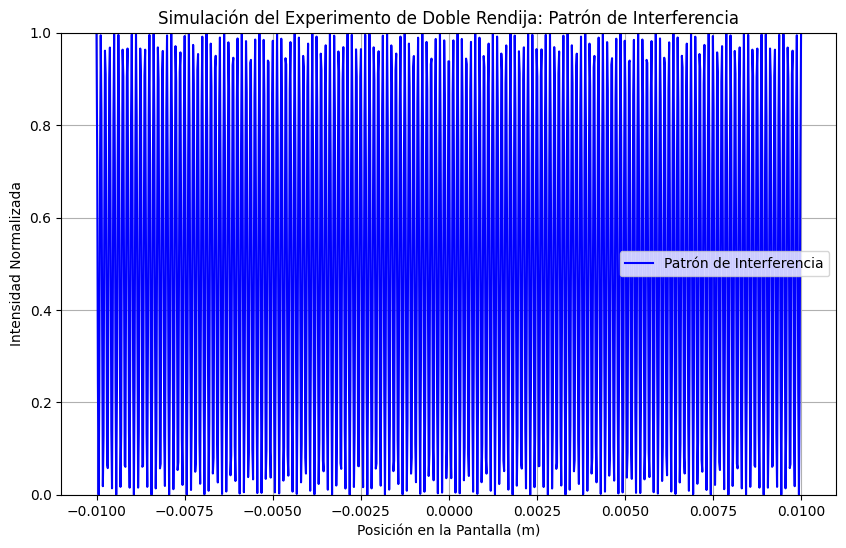

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
slit_distance = 0.001  # distancia entre las dos rendijas (en metros)
wavelength = 500e-9    # longitud de onda de la luz (en metros, por ejemplo, 500 nm)
screen_distance = 0.5  # distancia de las rendijas a la pantalla (en metros)
screen_width = 0.02    # ancho de la pantalla (en metros)
num_points = 1000      # número de puntos en la pantalla para calcular la intensidad

# Calcular el patrón de interferencia de ondas
screen_points = np.linspace(-screen_width / 2, screen_width / 2, num_points)  # puntos en la pantalla
intensity = np.zeros(num_points)  # inicializar la intensidad

# Calcular la intensidad en cada punto de la pantalla
for i, x in enumerate(screen_points):
    # Calcular el camino de las ondas desde cada rendija a un punto en la pantalla
    path_difference = (np.sqrt((x + slit_distance / 2) ** 2 + screen_distance ** 2) - 
                       np.sqrt((x - slit_distance / 2) ** 2 + screen_distance ** 2))
    
    # Calcular la intensidad (superposición de ondas)
    intensity[i] = (np.cos((2 * np.pi / wavelength) * path_difference)) ** 2

# Normalizar la intensidad
intensity = intensity / np.max(intensity)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(screen_points, intensity, label='Patrón de Interferencia', color='blue')
plt.xlabel('Posición en la Pantalla (m)')
plt.ylabel('Intensidad Normalizada')
plt.title('Simulación del Experimento de Doble Rendija: Patrón de Interferencia')
plt.legend()
plt.grid()
plt.ylim(0, 1)  # Ajustar el límite del eje Y a 1 para reflejar el rango de intensidad
plt.show()